<b>Basic Computer Vision</b>

In [6]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt

<b>Dataset</b>

In [7]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\SS\tensorflow_datasets\fashion_mnist\3.0.1.incomplete039MVC\fashion_mnist-train.tfrecord*..…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\SS\tensorflow_datasets\fashion_mnist\3.0.1.incomplete039MVC\fashion_mnist-test.tfrecord*...…

Dataset fashion_mnist downloaded and prepared to C:\Users\SS\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [8]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [9]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


<b>Image preprocessing</b>
- Pixel Normalization

In [10]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255 # a number between 0 and 1
  return images, labels

The map function applies the normalize function to each element in the train
and test datasets

In [ ]:
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

The first time you use the dataset, the images will be loaded from disk
Caching will keep them in memory, making training faster

In [ ]:
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

<b>Data Sample</b>

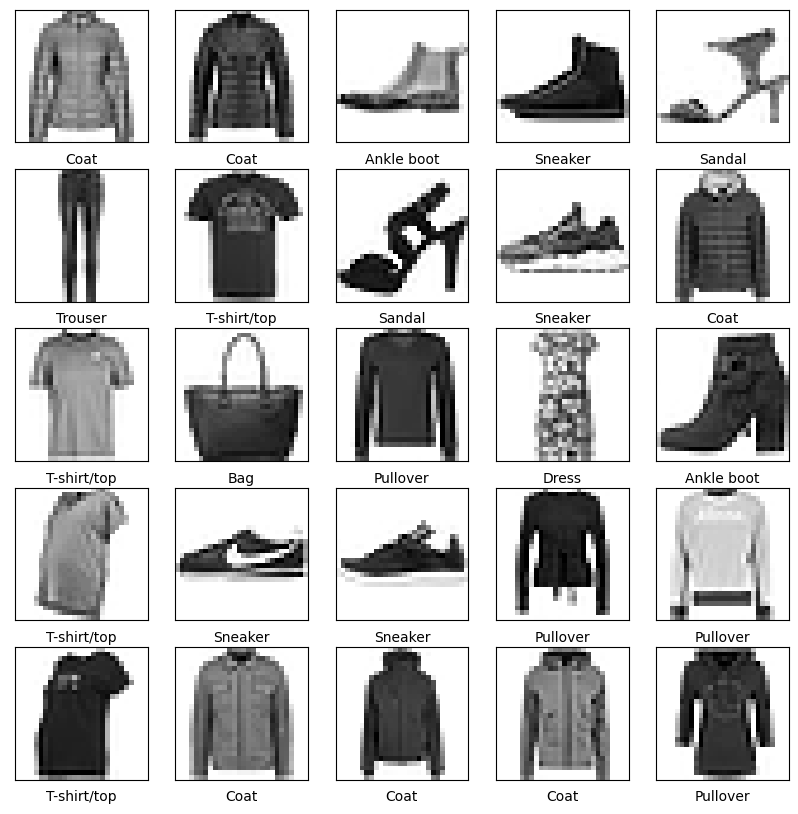

In [13]:
plt.figure(figsize=(10,10))
i = 0
for(image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i+= 1
plt.show()


<b>Model</b>

Building

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Model Compiling

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model training

- repeat the dataset should iterate forever, until fit ephochs parameter to the fit method is done.
- shuffle randomizes the order
- batch groups 32 examples when doing the training, this significantly speeds up the traiing process.

In [17]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_test_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [18]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 3.1515 - accuracy: 0.6817
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7159 - accuracy: 0.7225
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6217 - accuracy: 0.7586
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5823 - accuracy: 0.7753
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5369 - accuracy: 0.8070


Model testing

In [19]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/BATCH_SIZE))
print(test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.8066
0.8065999746322632


Predictions

In [20]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

1/1 [==============================] - 0s 98ms/step


In [21]:
predictions.shape

(32, 10)

In [22]:
predictions[0]

array([4.0159070e-05, 1.6963634e-09, 2.1112071e-01, 1.4750785e-04,
       7.5697005e-01, 2.4718198e-18, 3.1697914e-02, 7.3758845e-34,
       2.3658788e-05, 4.7519721e-28], dtype=float32)

class number 5 was the hihgest almost 75 confidence

In [23]:
np.argmax(predictions[0])

4

In [26]:
print(test_labels[4])
print(class_names[4])

5
Coat


Plotting the confidence levels

In [27]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

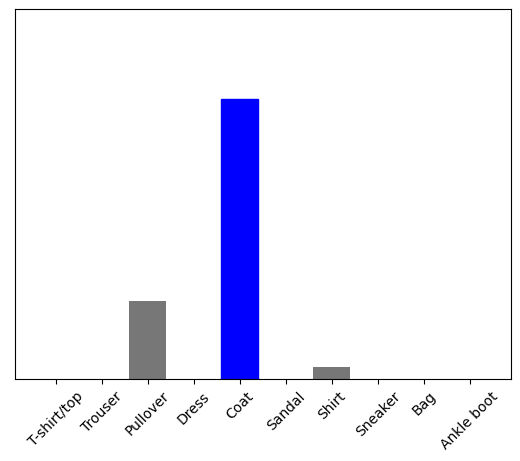

In [28]:
plot_value_array(0, predictions, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)